In [1]:
library('tidymodels')
library('palmerpenguins')

── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()


Attaching package: ‘palmerpenguins’


The following object is masked from ‘package:modeldata’:

    penguins




In [2]:
# remove the missing values for simplicity

penguins = penguins |> drop_na()

## Categorical (all species)

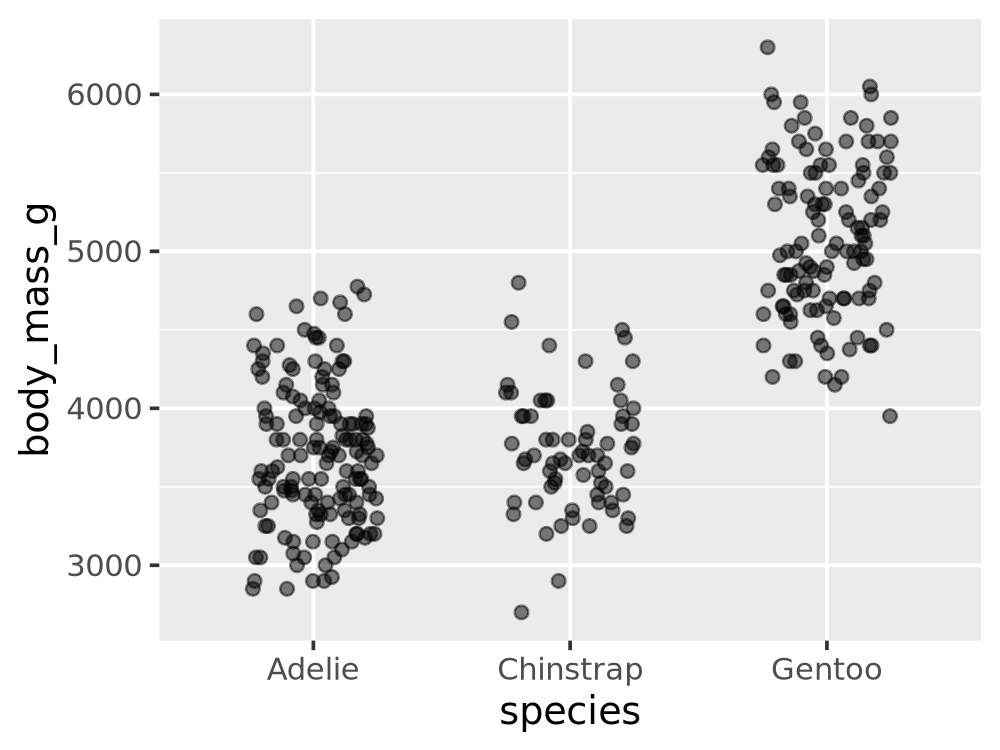

In [3]:
ggplot(penguins, aes(x = species, y = body_mass_g)) + 
    geom_point(
        position = position_jitter(width = 0.25, height = 0),
        alpha = 0.5
    )

In [4]:
penguins |> pull(species)

[1] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
  [8] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [15] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [22] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [29] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [36] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [43] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [50] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [57] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [64] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [71] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [78] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [85] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [92] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
 [99] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[106] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[113] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[120] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[127] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[134] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Adelie   
[141] Adelie    Adelie    Adelie    Adelie    Adelie    Adelie    Gentoo   
[148] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[155] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[162] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[169] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[176] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[183] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[190] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[197] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[204] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[211] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[218] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[225] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[232] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[239] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[246] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[253] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo   
[260] Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Gentoo    Chinstrap
[267] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[274] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[281] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[288] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[295] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[302] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[309] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[316] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[323] Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap Chinstrap
[330] Chinstrap Chinstrap Chinstrap Chinstrap
Levels: Adelie Chinstrap Gentoo

In [5]:
mod = linear_reg() |> set_engine('lm')

rec = recipe(body_mass_g ~ species, data = penguins) |>
    step_dummy(species) |>
    prep()

In [6]:
rec |> juice() |> head()

body_mass_g,species_Chinstrap,species_Gentoo
<int>,<dbl>,<dbl>
3750,0,0
3800,0,0
3250,0,0
3450,0,0
3650,0,0
3625,0,0


In [7]:
mod_fit = mod |> fit(body_mass_g ~ ., data = rec |> juice())

mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3706.16438,38.13563,97.1837676,6.880362e-245
species_Chinstrap,26.92385,67.65243,0.3979732,6.909073e-01
species_Gentoo,1386.27259,56.90893,24.3594924,1.009947e-75


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


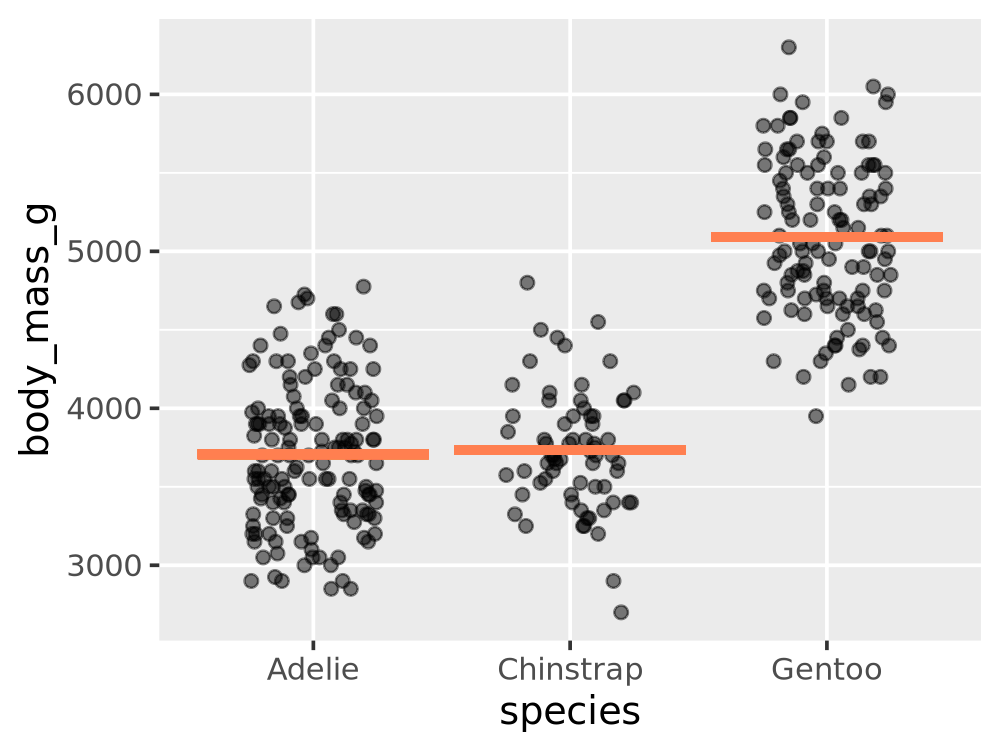

In [8]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(penguins) |>

ggplot(aes(x = species, y = body_mass_g)) + 
    geom_point(
        position = position_jitter(width = 0.25, height = 0),
        alpha = 0.5
    ) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), color = 'coral', size = 0.5)

## Multiple regression (Adelie versus Gentoo)

In [9]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


In [10]:
penguins2 = penguins |> 
    filter(species != 'Chinstrap') |>
    mutate(species = forcats::fct_drop(species))

penguins2 |> count(species)

species,n
<fct>,<int>
Adelie,146
Gentoo,119


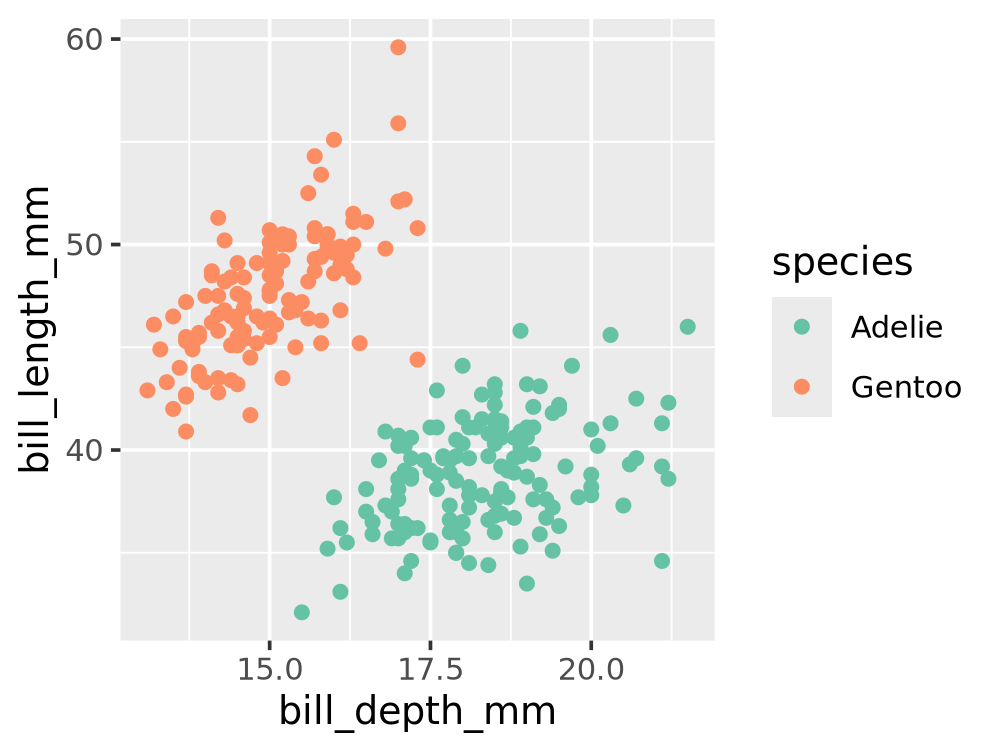

In [11]:
ggplot(penguins2, aes(x = bill_depth_mm, y = bill_length_mm,  color = species)) +
    geom_point() +
    scale_color_brewer(palette = 'Set2')

In [12]:
mod = linear_reg() |> set_engine('lm')

rec = recipe(bill_length_mm ~ bill_depth_mm + species, data = penguins2) |>
    step_dummy(species) |>
    prep()
    
rec |> juice() |> head()

bill_depth_mm,bill_length_mm,species_Gentoo
<dbl>,<dbl>,<dbl>
18.7,39.1,0
17.4,39.5,0
18.0,40.3,0
19.3,36.7,0
20.6,39.3,0
17.8,38.9,0


In [13]:
mod_fit = mod |> fit(bill_length_mm ~ ., data = rec |> juice())

mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),15.606408,2.532260,6.163035,2.680685e-09
bill_depth_mm,1.265451,0.137557,9.199471,1.170989e-17
species_Gentoo,12.984143,0.554760,23.404974,3.775343e-66


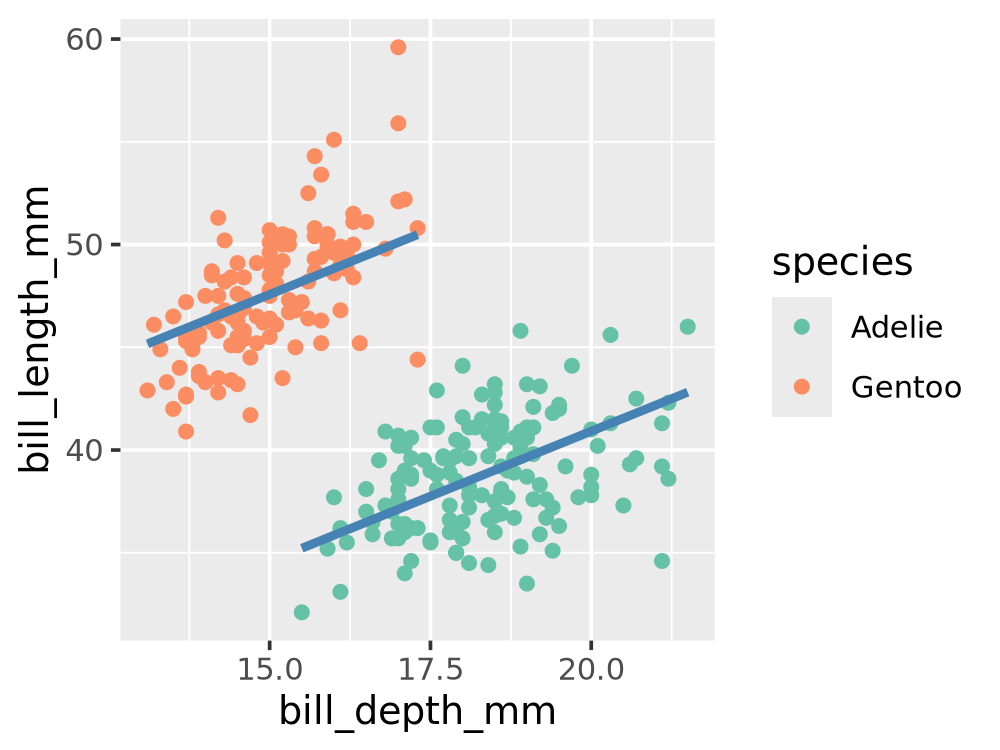

In [14]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(penguins2) |>
ggplot(aes(x = bill_depth_mm, y = bill_length_mm,  color = species)) +
    geom_point() +
    geom_line(aes(y = .pred, group = species), color = 'steelblue', linewidth = 1.2) +
    scale_color_brewer(palette = 'Set2')

## Interaction term

**Starting with the base equation:**

$$y = m \cdot \mathit{bill\_depth} + n \cdot \mathit{is\_gentoo} + b$$

**Adding a slope modifier $o$ when $\mathit{is\_gentoo} = 1$:**
$$y = (m + o) \cdot \mathit{bill\_depth} + n \cdot \mathit{is\_gentoo} + b$$

**Distributing $\mathit{bill\_depth}$ when $\mathit{is\_gentoo} = 1$:**
$$y = m \cdot \mathit{bill\_depth} + o \cdot \mathit{bill\_depth} + n \cdot \mathit{is\_gentoo} + b$$

**Generalizing to all values of $\mathit{is\_gentoo}$ (which should be either 0 or 1):**
$$y = m \cdot \mathit{bill\_depth} + o \cdot \mathit{bill\_depth} \cdot \mathit{is\_gentoo} + n \cdot \mathit{is\_gentoo} + b$$

In [15]:
mod = linear_reg() |> set_engine('lm')

rec = recipe(bill_length_mm ~ bill_depth_mm + species, data = penguins2) |>
    step_dummy(species) |>
    step_interact(~bill_depth_mm:species_Gentoo) |>  # This makes our interaction feature!
    prep()
    
rec |> juice() |> head()

bill_depth_mm,bill_length_mm,species_Gentoo,bill_depth_mm_x_species_Gentoo
<dbl>,<dbl>,<dbl>,<dbl>
18.7,39.1,0,0
17.4,39.5,0,0
18.0,40.3,0,0
19.3,36.7,0,0
20.6,39.3,0,0
17.8,38.9,0,0


In [16]:
mod_fit = mod |> fit(bill_length_mm ~ ., data = rec |> juice())

mod_fit |> tidy()

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),23.3668186,3.0285370,7.715547,2.556181e-13
bill_depth_mm,0.8424775,0.1647067,5.115017,6.081473e-07
species_Gentoo,-6.6966373,4.5482603,-1.472351,1.421308e-01
bill_depth_mm_x_species_Gentoo,1.2178433,0.2794796,4.357538,1.892695e-05


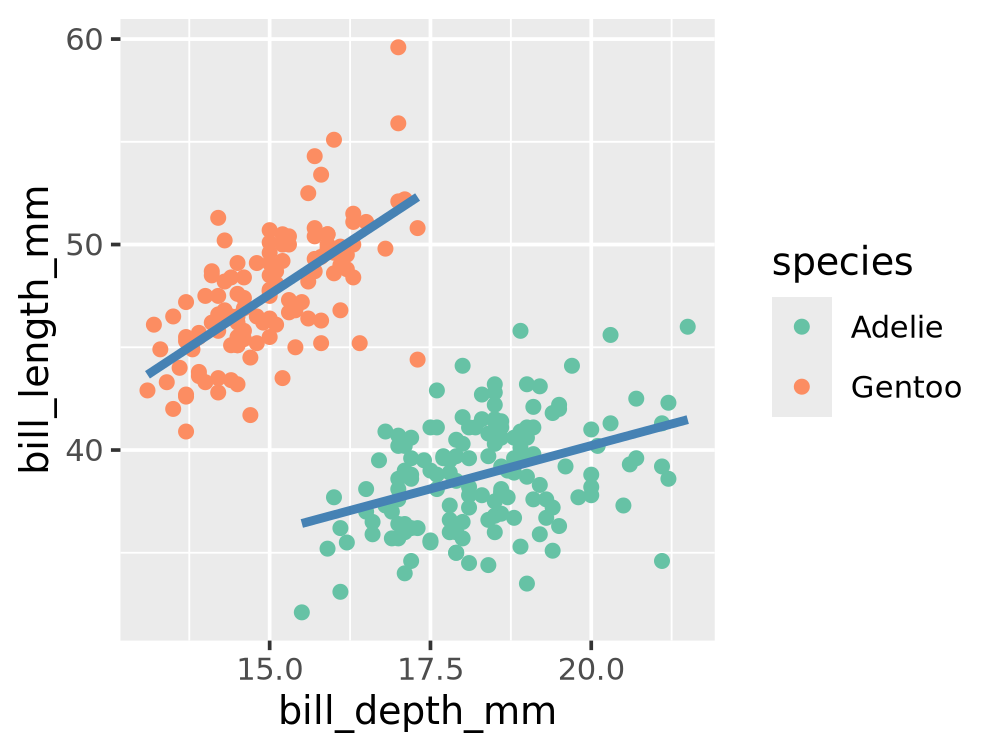

In [17]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(penguins2) |>
ggplot(aes(x = bill_depth_mm, y = bill_length_mm,  color = species)) +
    geom_point() +
    geom_line(aes(y = .pred, group = species), color = 'steelblue', linewidth = 1.2) +
    scale_color_brewer(palette = 'Set2')